In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib.lines import Line2D

## Loss de Treinamento e Teste

In [18]:
epochs = [1, 2, 3, 4, 5]

In [19]:
models = {
    "Modelo A": {
        "train_loss": [
            0.29091294572625787,
            0.07765235238782833,
            0.03488803409365651,
            0.007497639238885804,
            0.0024330466421481015,
        ],
        "test_loss": [
            0.08791896360344253,
            0.05930741100019077,
            0.0897792825999204,
            0.07531580289105477,
            0.07241666069785424,
        ],
    },
    "Modelo B": {
        "train_loss": [
            0.42737993479140696,
            0.16329068786527481,
            0.08799150406148719,
            0.03859527116538557,
            0.042765215162096394,
        ],
        "test_loss": [
            0.13165241468232125,
            0.11127594465506263,
            0.10972326087357942,
            0.07367796684411587,
            0.07857584022349329,
        ],
    },
    "Modelo C": {
        "train_loss": [
            0.32609023124070985,
            0.09555370390895138,
            0.03873215114949214,
            0.015111153709639344,
            0.022531716195877894,
        ],
        "test_loss": [
            0.1491212801192887,
            0.05823015821806621,
            0.055837495703599416,
            0.06310486547590699,
            0.0644687177882588,
        ],
    },
}

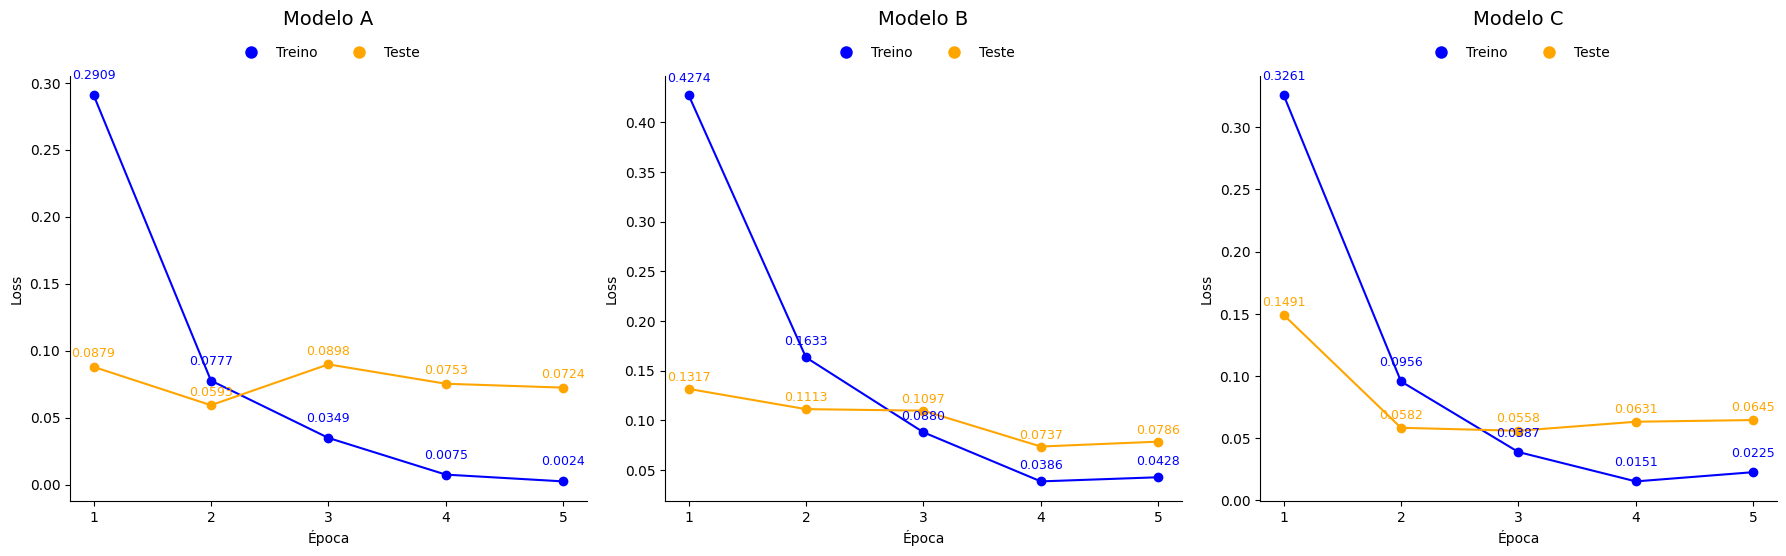

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=len(models), figsize=(18, 6))

# fig.suptitle(
#     "Loss de Treinamento e Teste ao longo das épocas", fontsize=16
# )

if len(models) == 1:
    axs = [axs]

for ax, (model_name, model_data) in zip(axs, models.items()):
    ax.plot(epochs, model_data["train_loss"], marker="o", label="Treino", color="blue")
    ax.plot(epochs, model_data["test_loss"], marker="o", label="Teste", color="orange")

    for i in range(len(epochs)):
        ax.text(
            epochs[i],
            model_data["train_loss"][i] + 0.01,
            f"{model_data['train_loss'][i]:.4f}",
            ha="center",
            va="bottom",
            fontsize=9,
            color="blue",
        )
        ax.text(
            x=epochs[i],
            y=model_data["test_loss"][i] + 0.005,
            s=f"{model_data['test_loss'][i]:.4f}",
            ha="center",
            va="bottom",
            fontsize=9,
            color="orange",
        )

    ax.set_xlabel("Época")
    ax.set_xticks(epochs)

    ax.set_ylabel("Loss")

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.set_title(
        f"{model_name}",
        fontsize=14,
        y=1.1,
    )

    # ax.legend()
    # Create custom legend
    legend_elements = [
        Line2D(
            [0],
            [0],
            marker="o",
            color="w",
            label="Treino",
            markerfacecolor="blue",
            markersize=10,
        ),
        Line2D(
            [0],
            [0],
            marker="o",
            color="w",
            label="Teste",
            markerfacecolor="orange",
            markersize=10,
        ),
    ]

    ax.legend(
        handles=legend_elements,
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=2,
        edgecolor="1",
    )

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the legend

plt.savefig(
    "train_and_test_loss_models.png",
    transparent=False,
    dpi=300,
)

plt.show()

## Matriz de Confusão

In [21]:
cm_model_a = np.array(
    [
        [193, 4, 0],
        [2, 251, 3],
        [3, 10, 186],
    ]
)

In [22]:
cm_model_b = np.array(
    [
        [193, 4, 0],
        [6, 244, 6],
        [5, 8, 186],
    ]
)

In [23]:
cm_model_c = np.array(
    [
        [193, 4, 0],
        [4, 242, 10],
        [3, 5, 191],
    ]
)

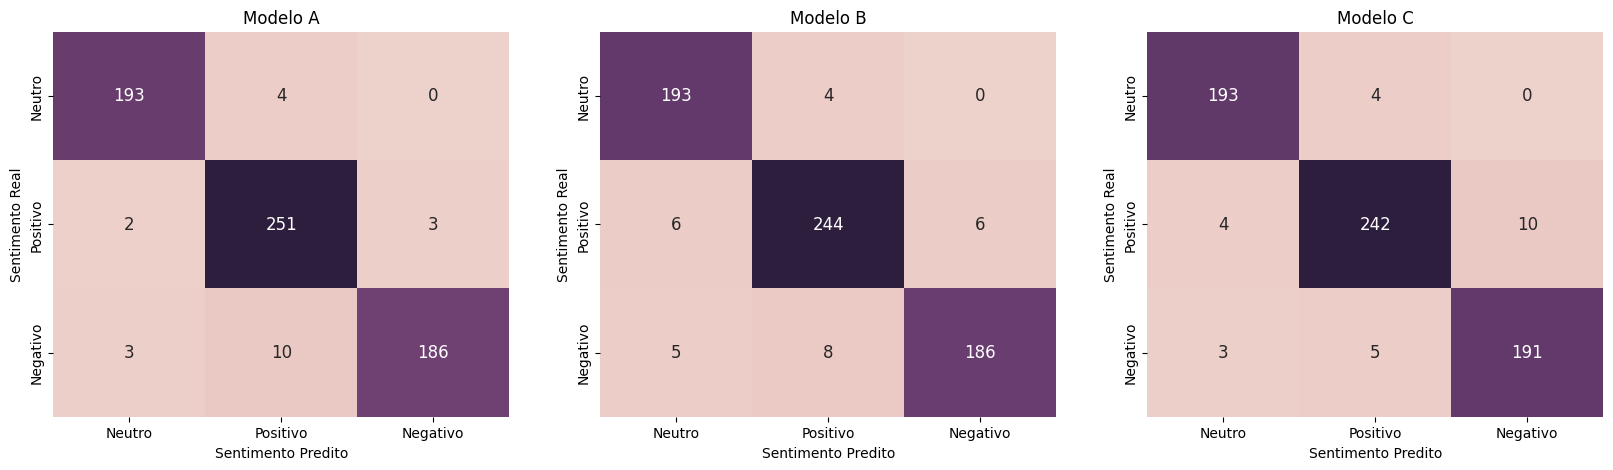

In [24]:
fig, axs = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(20, 5),
    gridspec_kw={"wspace": 0.2},
)

# fig.suptitle("Matriz de Confusão dos Dados de Teste", fontsize=16, y=1.05)

for ax, cm, model_name in zip(
    axs, [cm_model_a, cm_model_b, cm_model_c], ["Modelo A", "Modelo B", "Modelo C"]
):
    sns.heatmap(
        data=cm,
        annot=True,
        fmt="d",
        annot_kws={
            "fontsize": 12,
        },
        cbar=False,
        cmap=sns.cubehelix_palette(as_cmap=True),
        xticklabels=["Neutro", "Positivo", "Negativo"],
        yticklabels=["Neutro", "Positivo", "Negativo"],
        ax=ax,
    )

    ax.set_title(model_name)
    ax.set_ylabel("Sentimento Real")
    ax.set_xlabel("Sentimento Predito")

plt.savefig(
    "confusion_matrices.png",
    transparent=False,
    dpi=300,
    bbox_inches="tight",
)

plt.show()

## Perfomance

### Modelo A
|              | precision | recall | f1-score | support |
| ------------ | --------- | ------ | -------- | ------- |
| Neutro       | 0.97      | 0.98   | 0.98     | 197     |
| Positivo     | 0.95      | 0.98   | 0.96     | 256     |
| Negativo     | 0.98      | 0.93   | 0.96     | 199     |
| accuracy     |           |        | 0.97     | 652     |
| macro avg    | 0.97      | 0.97   | 0.97     | 652     |
| weighted avg | 0.97      | 0.97   | 0.97     | 652     |

### Modelo B
|              | precision | recall | f1-score | support |
| ------------ | --------- | ------ | -------- | ------- |
| Neutro       | 0.95      | 0.98   | 0.96     | 197     |
| Positivo     | 0.95      | 0.95   | 0.95     | 256     |
| Negativo     | 0.97      | 0.93   | 0.95     | 199     |
| accuracy     |           |        | 0.96     | 652     |
| macro avg    | 0.96      | 0.96   | 0.96     | 652     |
| weighted avg | 0.96      | 0.96   | 0.96     | 652     |

### Modelo C
|              | precision | recall | f1-score | support |
| ------------ | --------- | ------ | -------- | ------- |
| Neutro       | 0.96      | 0.98   | 0.97     | 197     |
| Positivo     | 0.96      | 0.95   | 0.95     | 256     |
| Negativo     | 0.95      | 0.96   | 0.95     | 199     |
| accuracy     |           |        | 0.96     | 652     |
| macro avg    | 0.96      | 0.96   | 0.96     | 652     |
| weighted avg | 0.96      | 0.96   | 0.96     | 652     |
